<a href="https://colab.research.google.com/github/Shalinda99/fyp-HFI-module/blob/main/204200A_Close_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
import pandas as pd
import numpy as np
from google.colab import files



# drive.mount('/content/drive')
# Upload the file
uploaded = files.upload()


# Load the dataset
price_df = pd.read_csv('SP_SL_20_dataset_final.csv')

Saving SP_SL_20_dataset_final.csv to SP_SL_20_dataset_final (1).csv


In [7]:
sampath_bank_price_df = price_df[price_df['Company Name'] == "SAMPATH BANK PLC"]

In [8]:
sampath_bank_price_df['Trade Date'] = pd.to_datetime(sampath_bank_price_df['Trade Date']).dt.date

<ipython-input-8-9878d623258c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampath_bank_price_df['Trade Date'] = pd.to_datetime(sampath_bank_price_df['Trade Date']).dt.date


In [9]:
sampath_bank_price_df

,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.),Company Name,Stock Return
0,2025-01-31,120.75,121.5,119.00,119.50,523,1016885,122167426.0,SAMPATH BANK PLC,NaN
1,2025-01-30,119.75,120.5,118.75,120.00,587,1279402,152615285.3,SAMPATH BANK PLC,NaN
2,2025-01-29,122.00,122.0,118.50,119.25,1354,2563188,307574122.8,SAMPATH BANK PLC,NaN
3,2025-01-28,122.00,122.5,121.00,121.25,838,990361,120261351.3,SAMPATH BANK PLC,NaN
4,2025-01-27,122.00,123.0,121.50,122.00,694,895710,109462379.0,SAMPATH BANK PLC,NaN
...,...,...,...,...,...,...,...,...,...,...
1176,2020-01-08,155.00,157.7,152.10,153.50,296,223009,34281462.0,SAMPATH BANK PLC,NaN
1177,2020-01-07,160.00,160.0,154.60,155.20,422,5889387,935802526.7,SAMPATH BANK PLC,NaN
1178,2020-01-06,161.10,161.9,158.70,159.60,333,78825,12600657.8,SAMPATH BANK PLC,NaN
1179,2020-01-03,165.00,165.0,161.00,161.40,338,125377,20294538.2,SAMPATH BANK PLC,NaN


In [10]:
import matplotlib.pyplot as plt

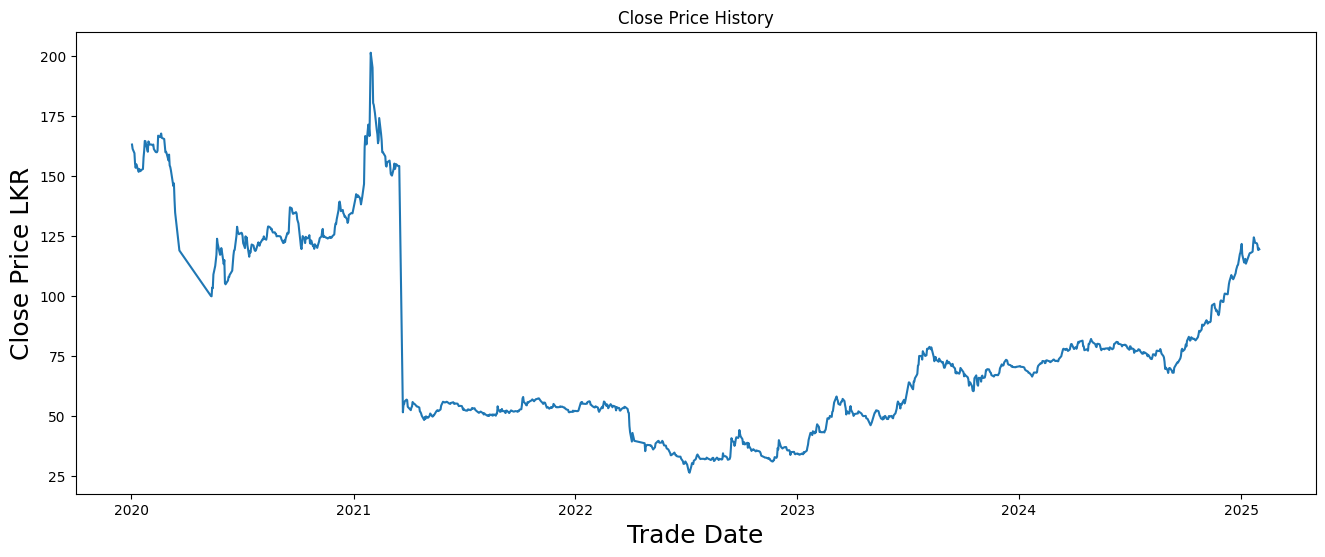

In [11]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(sampath_bank_price_df['Trade Date'],sampath_bank_price_df['Close (Rs.)'])
plt.xlabel('Trade Date', fontsize=18)
plt.ylabel('Close Price LKR', fontsize=18)
plt.show()

In [12]:
# Create a new dataframe with only the 'Close column
data = sampath_bank_price_df.filter(['Close (Rs.)'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1122

In [13]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.53196347],
       [0.53481735],
       [0.53053653],
       ...,
       [0.76084475],
       [0.77111872],
       [0.78139269]])

In [14]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.53196347, 0.53481735, 0.53053653, 0.54195205, 0.54623288,
       0.54765982, 0.55479452, 0.56050228, 0.54623288, 0.52625571,
       0.52340183, 0.52340183, 0.52197489, 0.50199772, 0.49771689,
       0.50913242, 0.50057078, 0.50057078, 0.519121  , 0.54480594,
       0.52482877, 0.52054795, 0.49486301, 0.49343607, 0.48344749,
       0.47488584, 0.46347032, 0.46061644, 0.46489726, 0.46489726,
       0.47060502, 0.45633562, 0.44920091, 0.43635845, 0.42494292,
       0.42494292, 0.42636986, 0.42636986, 0.41952055, 0.40696347,
       0.40639269, 0.41038813, 0.40810502, 0.39383562, 0.38070776,
       0.375     , 0.3869863 , 0.3847032 , 0.39041096, 0.39212329,
       0.40239726, 0.39840183, 0.37785388, 0.36073059, 0.35844749,
       0.35787671, 0.35502283, 0.36073059, 0.3630137 , 0.36015982])]
[np.float64(0.35159817351598177)]

[array([0.53196347, 0.53481735, 0.53053653, 0.54195205, 0.54623288,
       0.54765982, 0.55479452, 0.56050228, 0.54623288, 0.52625571,
       0.52340183, 0.52

In [15]:
!pip install keras

In [16]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=20)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - loss: 0.0073
Epoch 2/20
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 31s 30ms/step - loss: 0.0011
Epoch 3/20
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - loss: 8.3449e-04
Epoch 4/20
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - loss: 0.0012
Epoch 5/20
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 43s 31ms/step - loss: 7.8512e-04
Epoch 6/20
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - loss: 0.0020
Epoch 7/20
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - loss: 3.4466e-04
Epoch 8/20
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 43s 31ms/step - loss: 3.6190e-04
Epoch 9/20
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - loss: 9.6936e-04
Epoch 10/20
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - loss: 5.8804e-04
Epoch 11/20
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - loss: 0.0012
Epoch 12/20
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 32s 31ms/step - loss: 6.6501e-04
Epoch 13/20
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - loss: 0.0015
Epoch 14/20
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 40

In [17]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step


np.float64(5.261509288333471)

In [18]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")

R-squared: 0.9313193547440239


<ipython-input-19-21cf9d8732df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


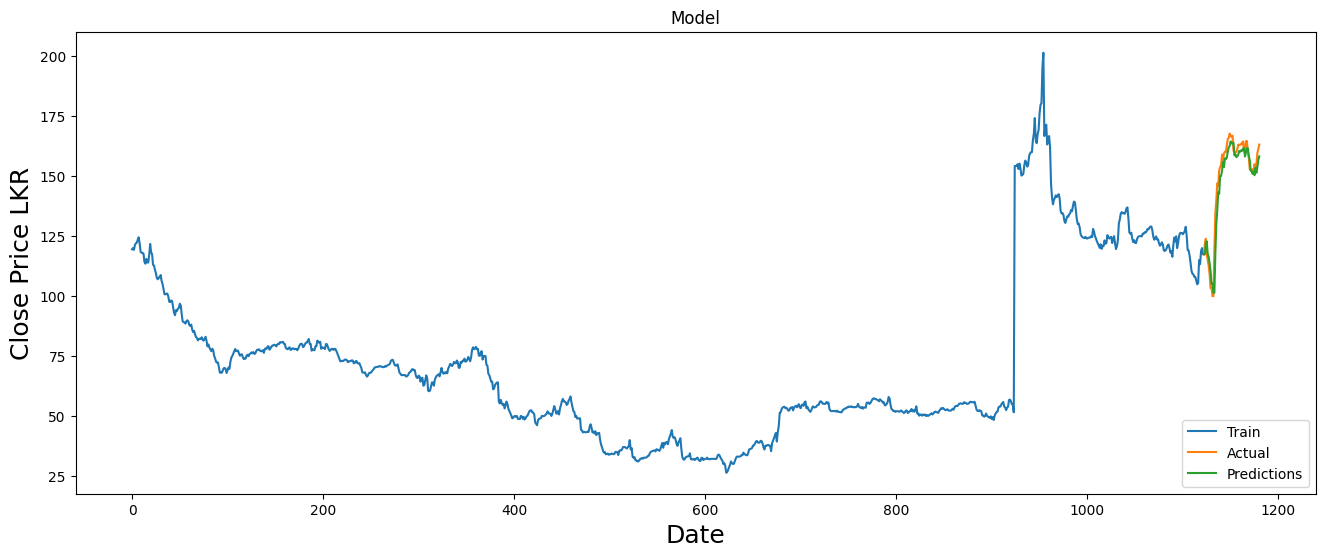

In [19]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price LKR', fontsize=18)
plt.plot(train['Close (Rs.)'])
plt.plot(valid[['Close (Rs.)', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

In [20]:
future_predictions = []

In [21]:
_x_test = x_test[:1]

In [24]:
for i in range(training_data_len, len(dataset)):
    _pred = model.predict(_x_test)
    future_predictions.append(scaler.inverse_transform(_pred))
    _pred = _pred.reshape(1, 1, 1)
    _x_test = np.concatenate((_x_test, _pred), axis=1)
    _x_test = _x_test[:, 1:, :]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━

<ipython-input-26-00334b17e7c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['future_predictions'] = future_predictions[:len(valid)]


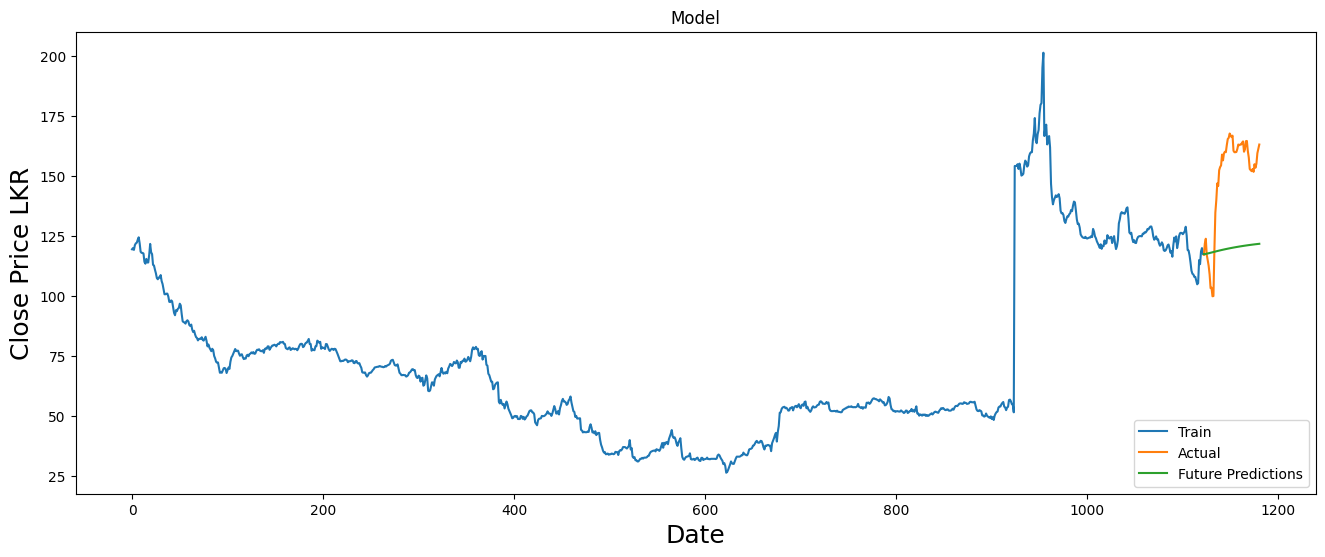

In [26]:
# Ensure future_predictions matches the length of valid
valid['future_predictions'] = future_predictions[:len(valid)]

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price LKR', fontsize=18)

# Plot the training and actual validation data
plt.plot(train['Close (Rs.)'])
plt.plot(valid[['Close (Rs.)', 'future_predictions']])

# Add legend
plt.legend(['Train', 'Actual', 'Future Predictions'], loc='lower right')
plt.show()
